In [1]:
# Written by Dara Storer
# 03/10/20

%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

This notebook is analyzing data that was taken on site. We were testing the effects of whether dish doors are on/off, having extra mesh sitting inside the dish, and the extreme case of having the extra mesh grounded to the metal braid that comes down from the feed. See the README file in this folder for details on each test shown below. 

## Day 1 spectra - Thunderstorms

### Showing all tests:

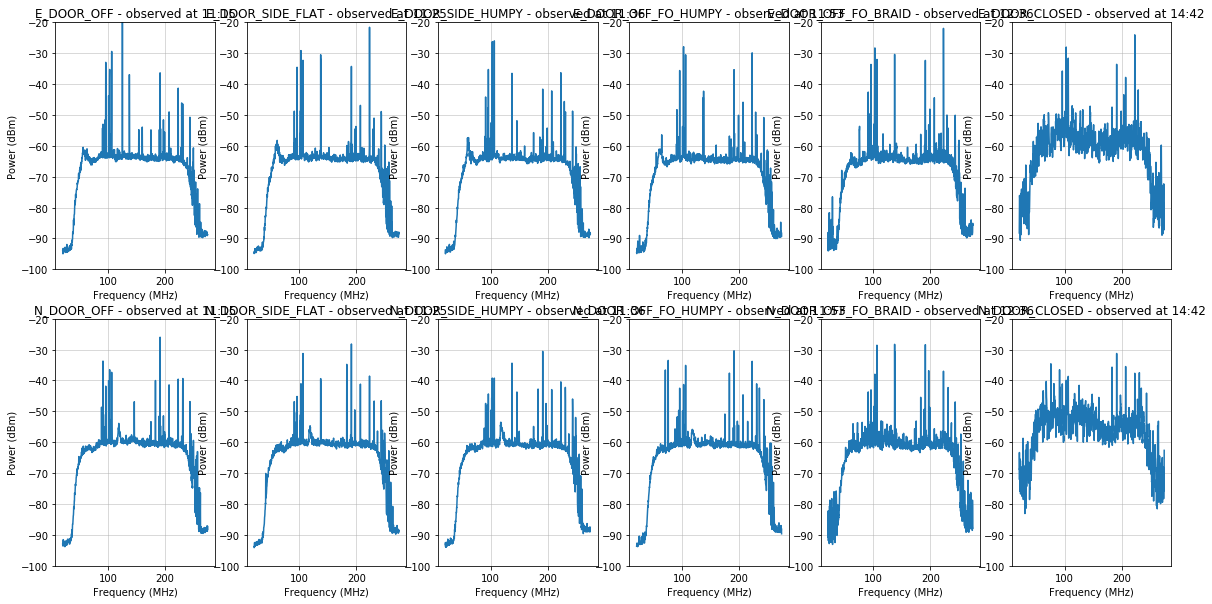

In [116]:
path = '/Users/home/Documents/_Files/Dara/School/Graduate/RadCos/Travel/SiteVisits/HeraFeb2020/DishDoors/Ant157DoorTestingSpectra'
tests = ['OFF','SIDE_FLAT','SIDE_HUMPY','OFF_FO_HUMPY','OFF_FO_BRAID','CLOSED']
times = ['11:15','11:25','11:36','11:53','12:36','14:42']
plot_spectra(tests=tests, times=times, Type='spectra', namePrefix='Day1_FreqSpectra_Thunder_AllTests', save=True)

### Showing only primary tests (tests that were repeated on Day 2)

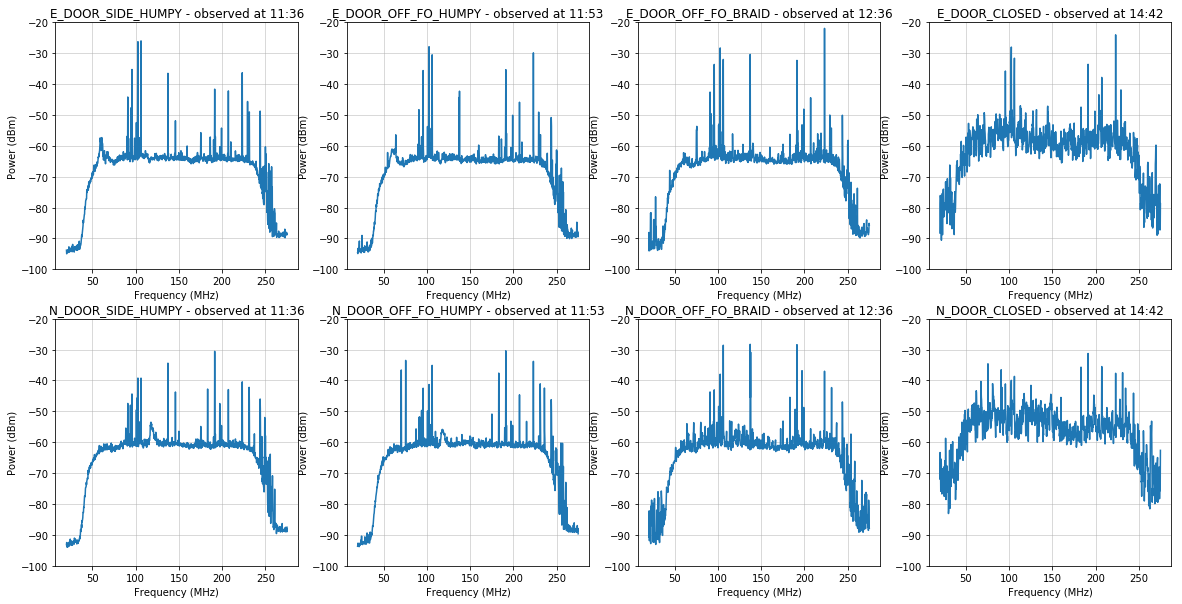

In [117]:
times = ['11:36','11:53','12:36','14:42']
tests = ['SIDE_HUMPY','OFF_FO_HUMPY','OFF_FO_BRAID','CLOSED']
plot_spectra(tests=tests, times=times, Type='spectra', namePrefix='Day1_FreqSpectra_Thunder_PrimaryTests', save=True)

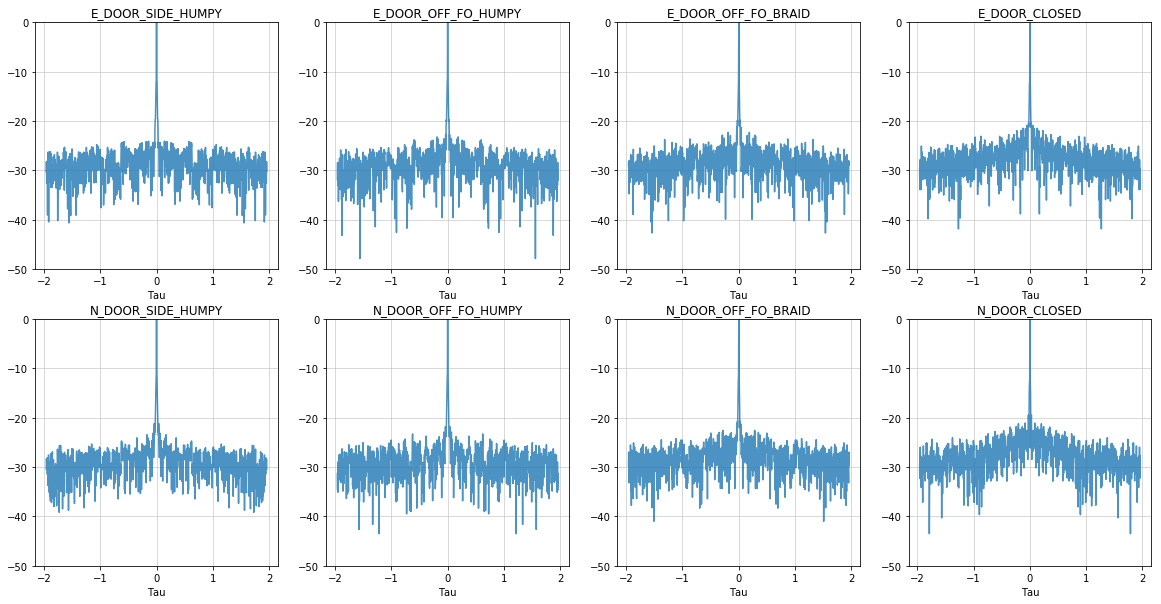

In [119]:
plot_spectra(tests=tests, Type='delay', namePrefix='Day1_DelaySpectra_full', save=True)

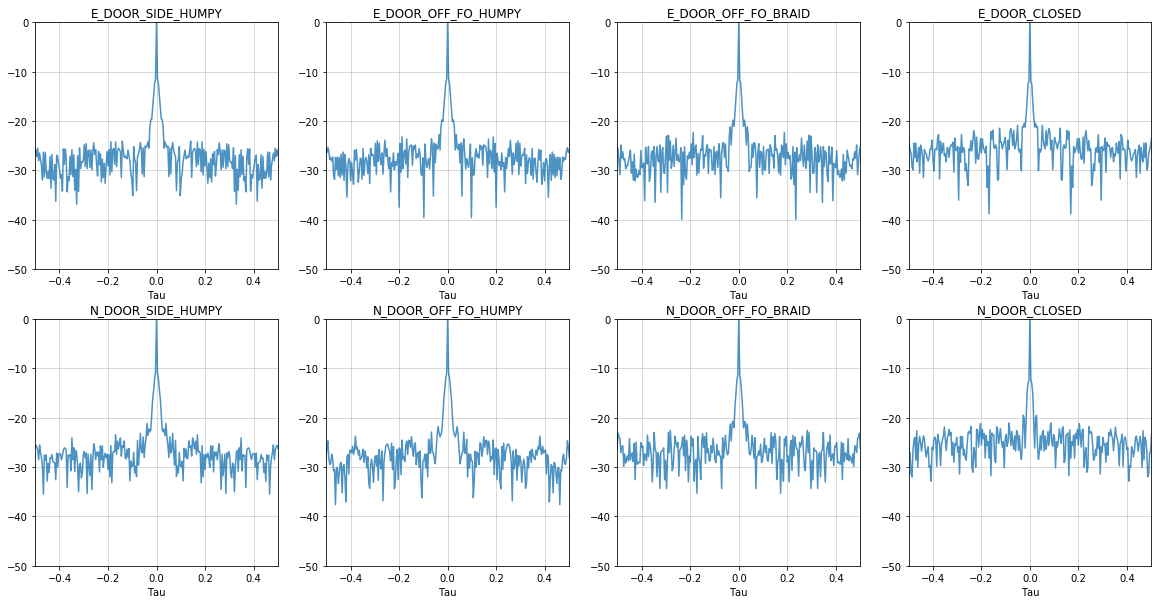

In [120]:
plot_spectra(tests=tests, Type='delay', namePrefix='Day1_DelaySpectra_clipped', save=True, clipDelay=True)

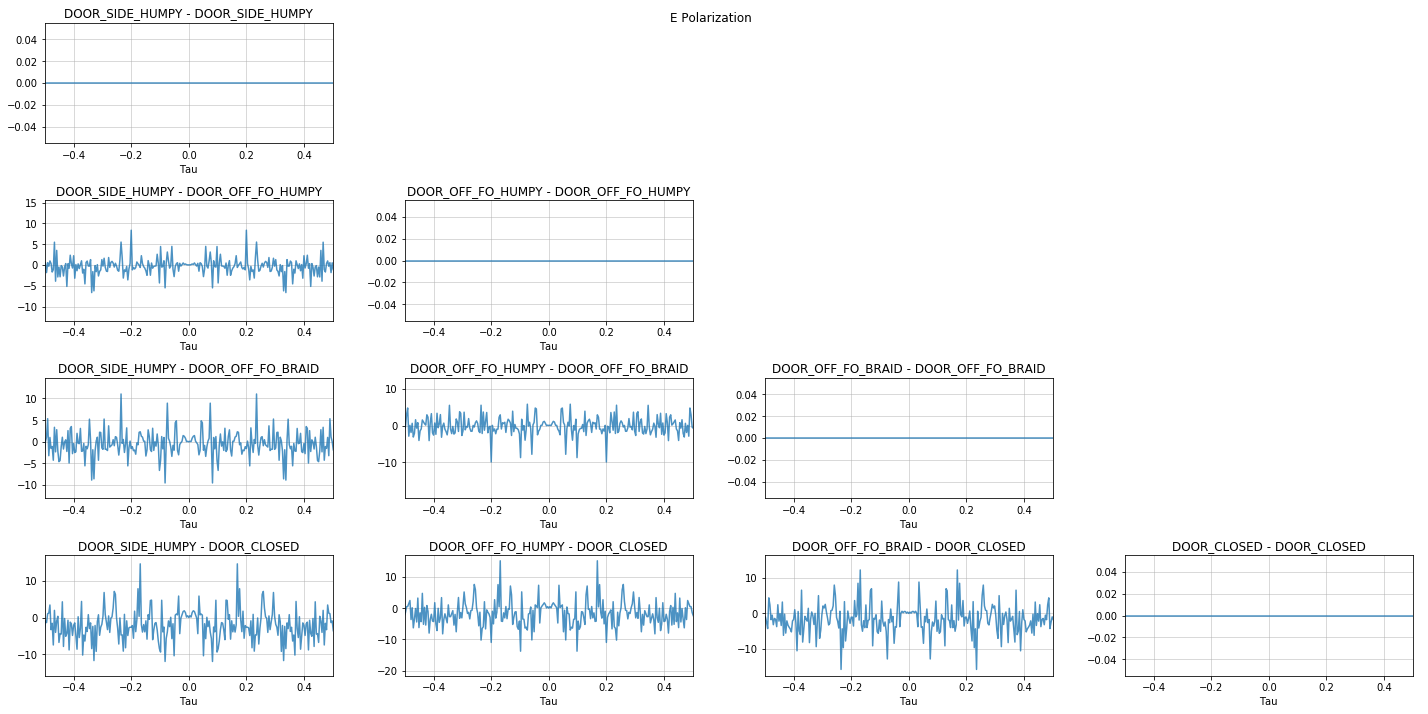

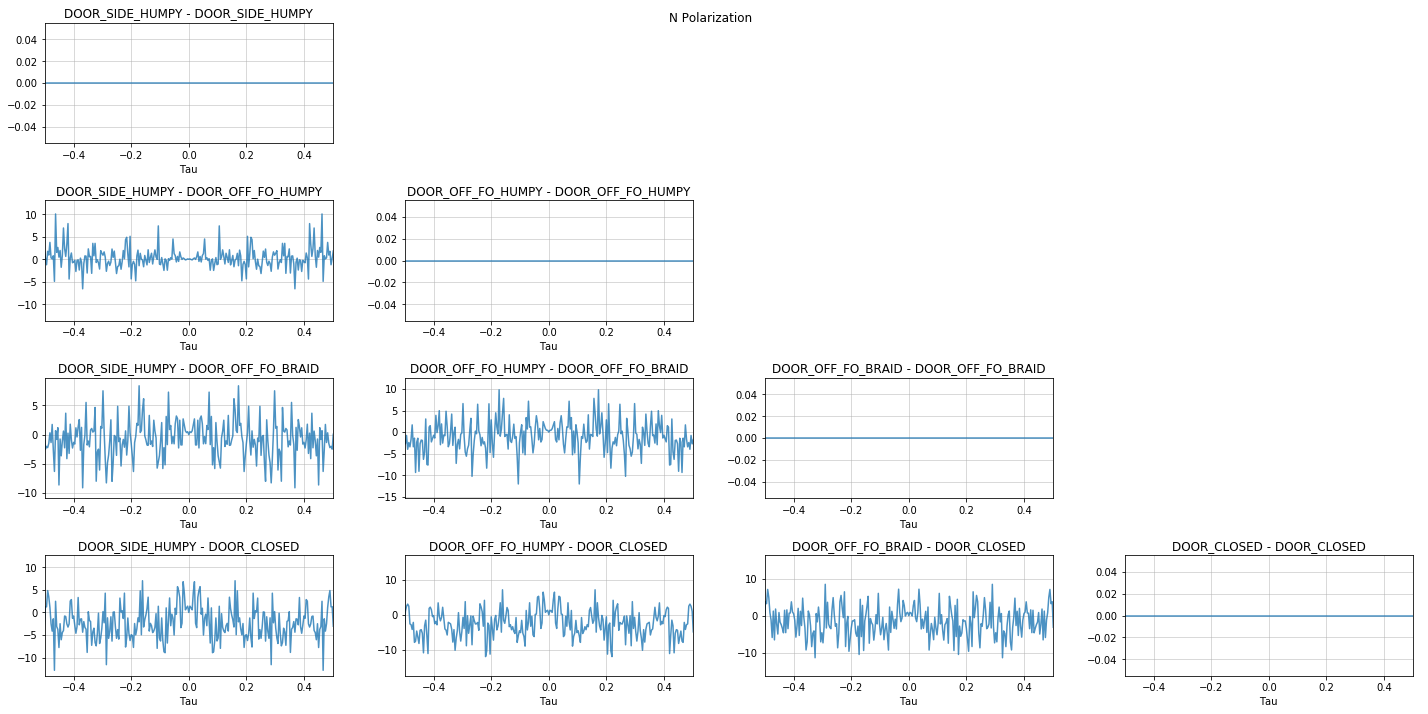

In [121]:
plot_differences(tests=tests, Type='delay', namePrefix='Day1_DelaySpectra_clipped_Diff', save=True, clipDelay=True)

## Day 2 Tests

### Spectra

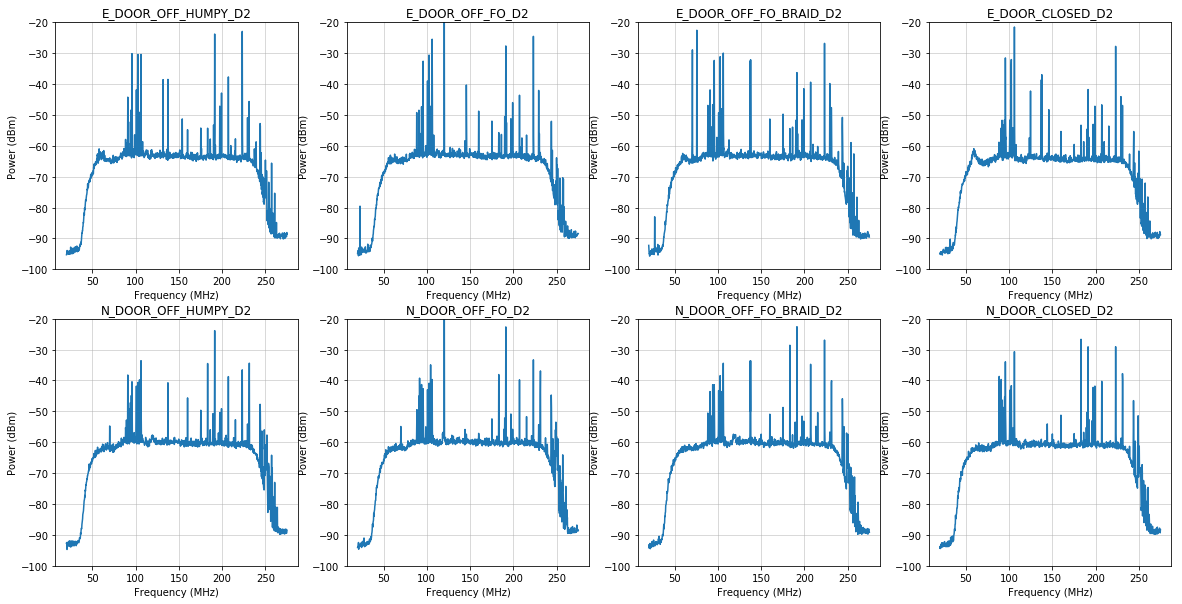

In [122]:
tests = ['OFF_HUMPY_D2','OFF_FO_D2','OFF_FO_BRAID_D2','CLOSED_D2']
plot_spectra(tests=tests, Type='spectra', namePrefix='Day2_FreqSpectra', save=True)

### Delay Spectra:

#### Showing all delays

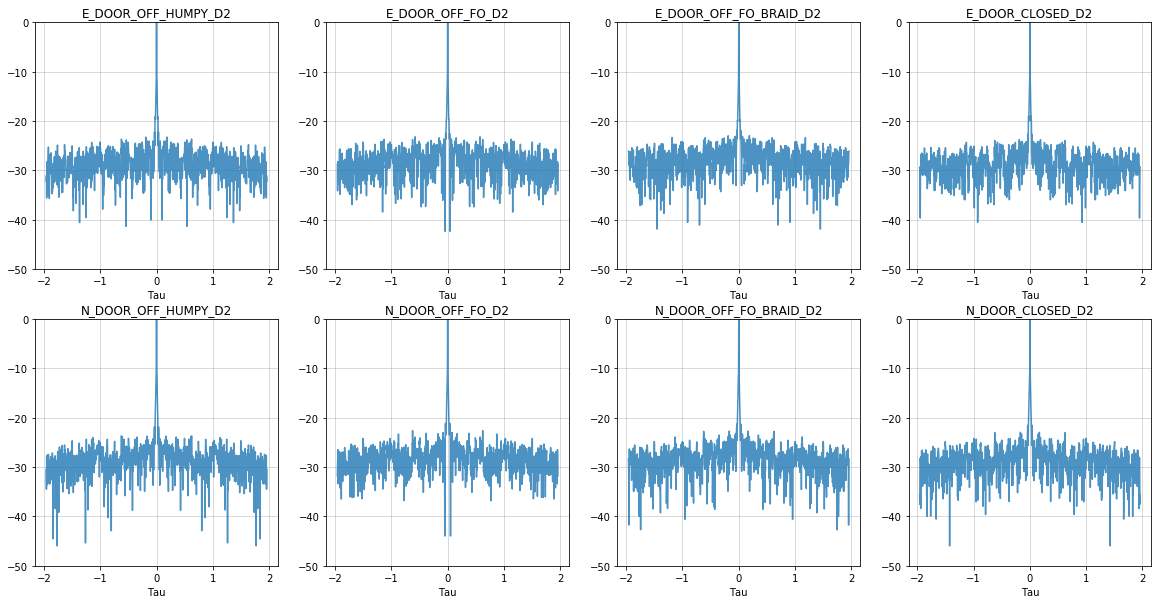

In [123]:
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_full', save=True)

#### Clipping to zoom in on small delays

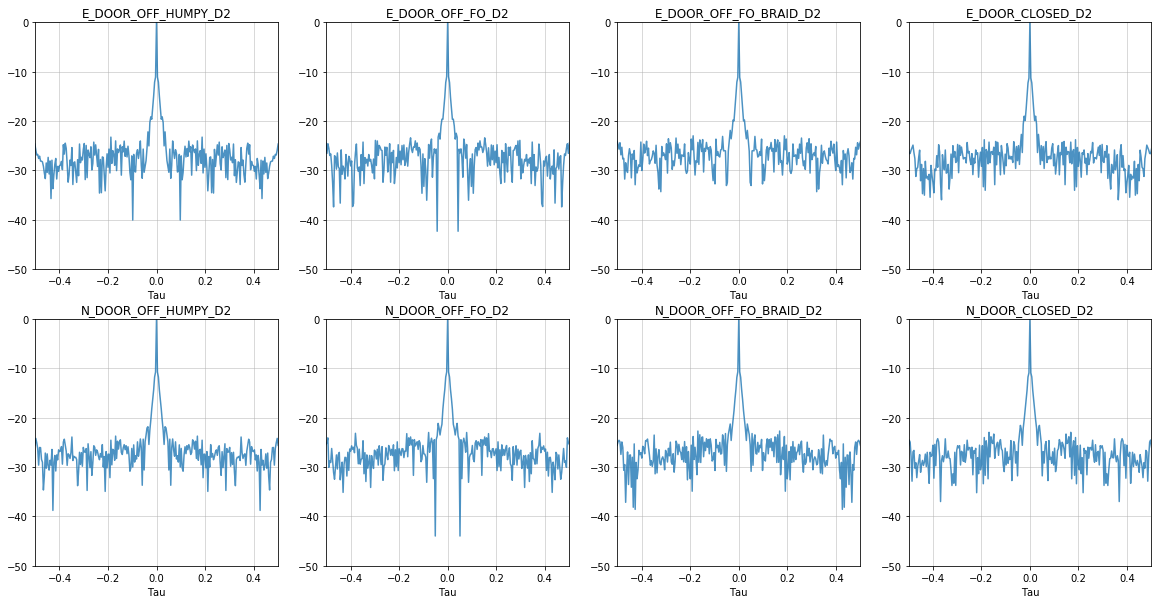

In [124]:
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_clipped', save=True, clipDelay=True)

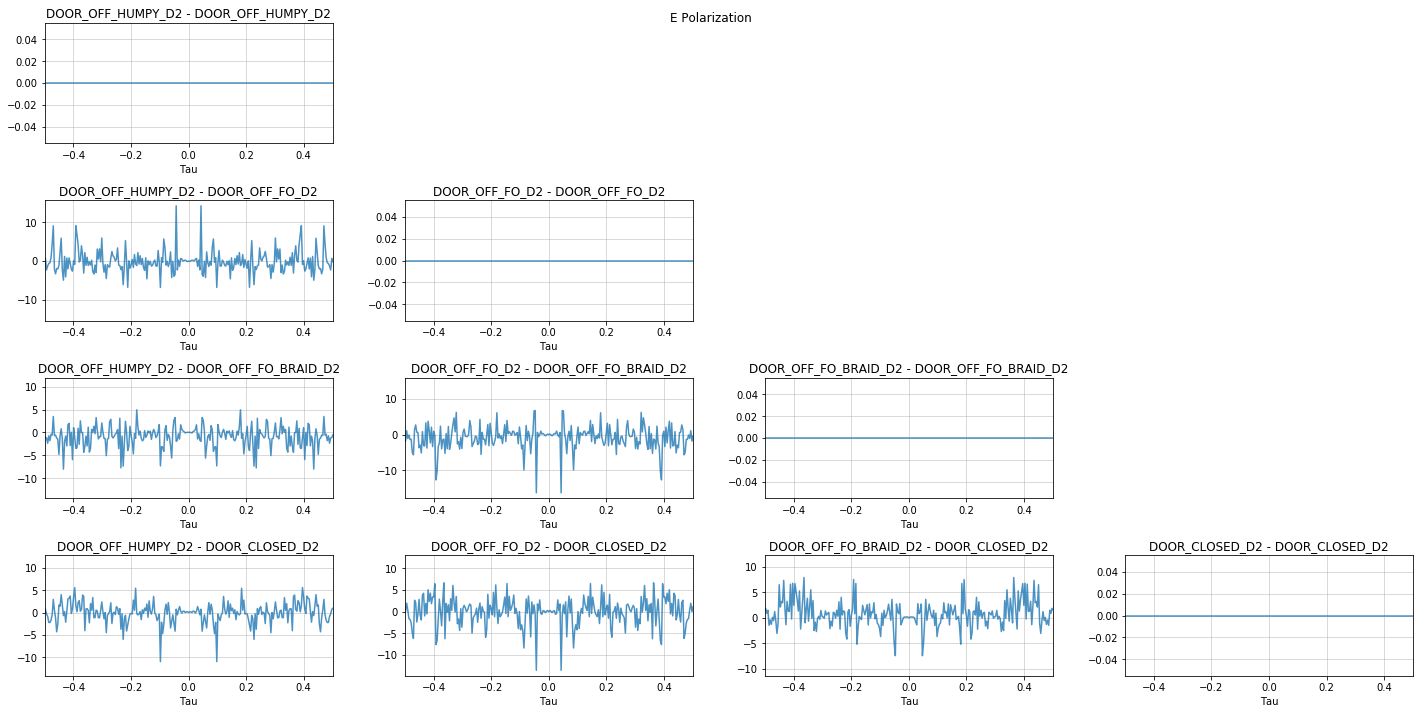

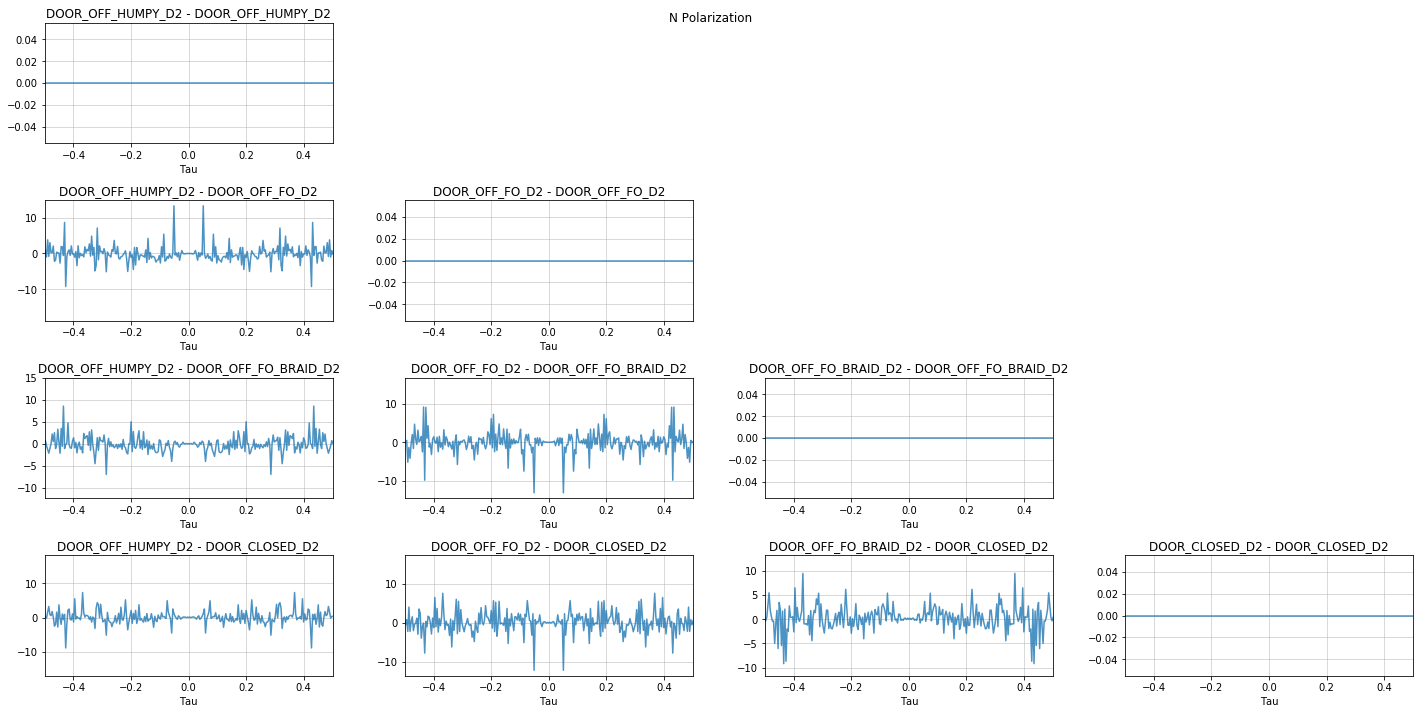

In [125]:
plot_differences(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_clipped_Diff', save=True, clipDelay=True)

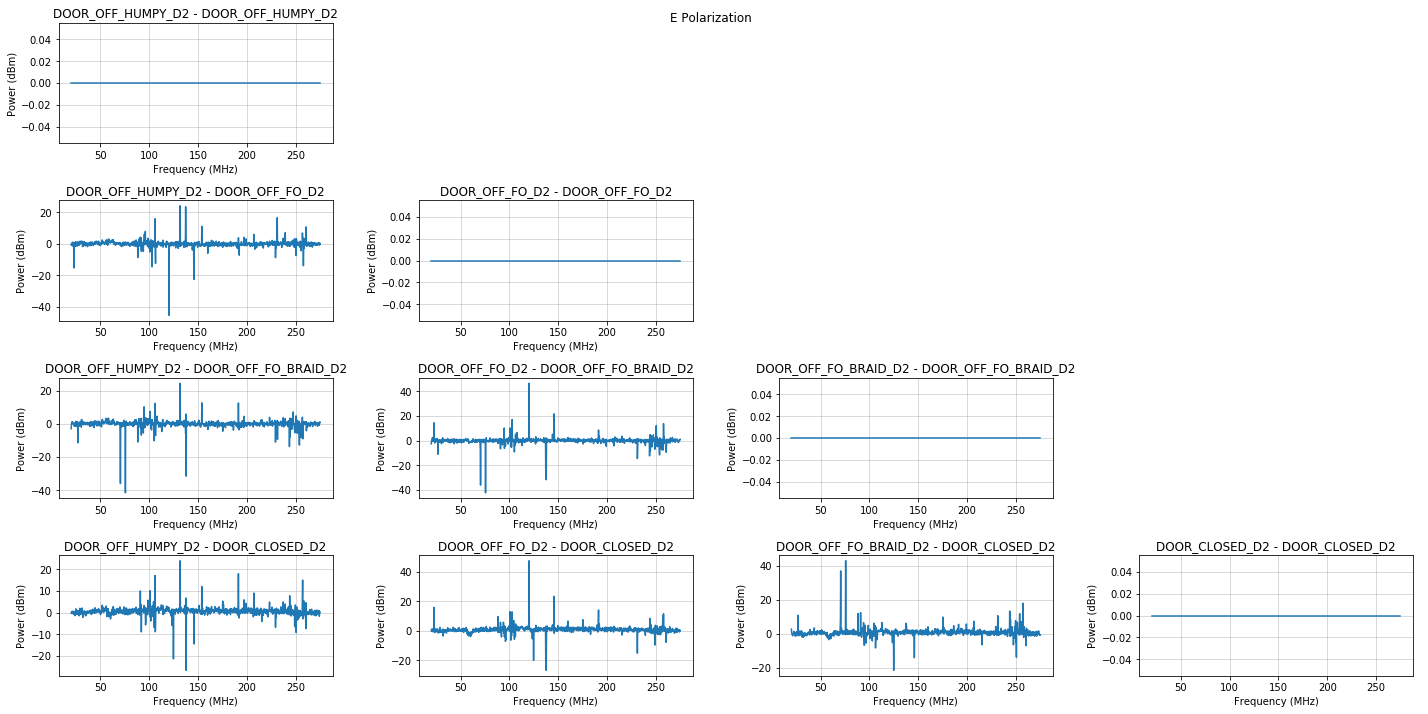

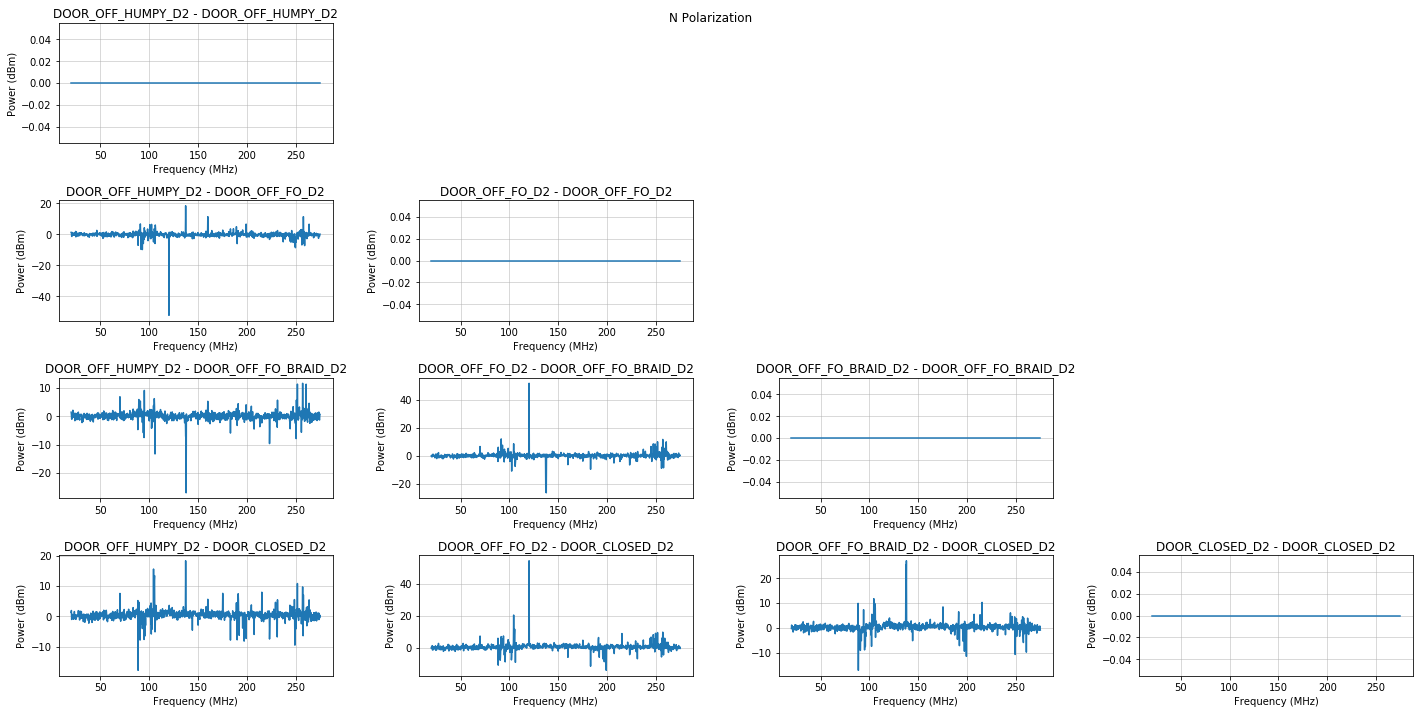

In [126]:
plot_differences(tests=tests, Type='spectra', namePrefix='Day2_RawSpectra_clipped_Diff', save=True, clipDelay=True)

In [136]:
def plot_spectra(tests=['OPEN'], Type='spectra', pols=['E','N'], skip_header=16, broad=True,
             times=None, namePrefix='', save=False, clipDelay=False, freqClip=None, flag=False):
    ntests = len(tests)
    npols = len(pols)
    fig, axs = plt.subplots(npols,ntests,figsize=(20, 10))
    for t in range(len(tests)):
        test = tests[t]
        for p in range(len(pols)):
            pol = pols[p]
            name = '/A157%s_DOOR_%s' % (pol,test)
            infile = path + name + '.csv'
            freq, data = np.genfromtxt(
                infile, delimiter=',', skip_header=skip_header, skip_footer=1,
                usecols=(0, 1), unpack=True
            )
            freq = np.asarray(freq / 1e6)
            data = np.asarray(data)
            if freqClip != None:
                ind0 = np.argmin(np.abs(freq-freqClip[0]))
                ind1 = np.argmin(np.abs(freq-freqClip[1]))
                freq = freq[ind0:ind1]
                data = data[ind0:ind1]
            if flag is True:
                m = np.median(data)
                s = np.std(data)
                for i in range(len(data)):
                    d = data[i]
                    #if d > (m+6):
                    if d > (m + 2*s):
                        #print('Flagging %s, pol %s at %fMHz' % (t, pol, freq[i]))
                        data[i] = m
            autos = np.multiply(data, np.conj(data))
            taus = np.fft.fftshift(np.fft.fftfreq(freq.size, np.diff(freq)[0]))
            delay = np.square(np.fft.fftshift(np.fft.fft(data)))
            ds = 10.*np.log10(np.sqrt(np.abs(delay)/np.abs(delay).max(axis=0)))
            if Type=='spectra':
                axs[p][t].plot(freq, data)
                axs[p][t].set_xlabel('Frequency (MHz)')
                axs[p][t].set_ylabel('Power (dBm)')
                axs[p][t].set_ylim((-100,-20))
            elif Type=='delay':
                axs[p][t].plot(taus, ds, alpha=0.8)
                axs[p][t].set_xlabel('Tau')
                if clipDelay:
                    axs[p][t].set_xlim((-.5,.5))
                axs[p][t].set_ylim((-50,0))
            else:
                print('Invalid Type variable')
                break
            axs[p][t].grid(which='both')
            axs[p][t].grid(which='minor', alpha=0.3)
            axs[p][t].grid(which='major', alpha=0.6)
            if times is None:
                axs[p][t].set_title(name[5:])
            else:
                axs[p][t].set_title('%s - observed at %s' % (name[5:], times[t]))
    if save:
        fig.savefig(path + '/' + namePrefix + '.pdf', format='pdf')

In [110]:
def plot_differences(tests=['OPEN'], Type='spectra', pols=['E','N'], skip_header=16, broad=True,
             times=None, namePrefix='', save=False, clipDelay=False):
    ntests = len(tests)
    npols = len(pols)
    for p in range(len(pols)):
        fig, axs = plt.subplots(ntests,ntests,figsize=(20, 10))
        for t in range(len(tests)):
            for t2 in range(len(tests)):
                if t2 > t:
                    axs[t][t2].axis('off')
                    continue
                test1 = tests[t]
                test2 = tests[t2]
                pol = pols[p]
                name1 = '/A157%s_DOOR_%s' % (pol,test1)
                infile1 = path + name1 + '.csv'
                freq1, data1 = np.genfromtxt(
                    infile1, delimiter=',', skip_header=skip_header, skip_footer=1,
                    usecols=(0, 1), unpack=True
                )
                data1 = np.asarray(data1)
                autos1 = np.multiply(data1, np.conj(data1))
                freq = np.asarray(freq1 / 1e6)
                taus = np.fft.fftshift(np.fft.fftfreq(freq.size, np.diff(freq)[0]))
                delay1 = np.square(np.fft.fftshift(np.fft.fft(data1)))
                ds1 = 10.*np.log10(np.sqrt(np.abs(delay1)/np.abs(delay1).max(axis=0)))
                
                name2 = '/A157%s_DOOR_%s' % (pol,test2)
                infile2 = path + name2 + '.csv'
                freq2, data2 = np.genfromtxt(
                    infile2, delimiter=',', skip_header=skip_header, skip_footer=1,
                    usecols=(0, 1), unpack=True
                )
                data2 = np.asarray(data2)
                autos2 = np.multiply(data2, np.conj(data2))
                freq = np.asarray(freq2 / 1e6)
                taus = np.fft.fftshift(np.fft.fftfreq(freq.size, np.diff(freq)[0]))
                delay2 = np.square(np.fft.fftshift(np.fft.fft(data2)))
                ds2 = 10.*np.log10(np.sqrt(np.abs(delay2)/np.abs(delay2).max(axis=0)))
                if Type=='spectra':
                    dif = np.subtract(data2,data1)
                    axs[t][t2].plot(freq, dif)
                    axs[t][t2].set_xlabel('Frequency (MHz)')
                    axs[t][t2].set_ylabel('Power (dBm)')
                elif Type=='delay':
                    dif = np.subtract(ds2, ds1)
                    axs[t][t2].plot(taus, dif, alpha=0.8)
                    axs[t][t2].set_xlabel('Tau')
                    if clipDelay:
                        axs[t][t2].set_xlim((-.5,.5))
                else:
                    print('Invalid Type variable')
                    break
                axs[t][t2].grid(which='both')
                axs[t][t2].grid(which='minor', alpha=0.3)
                axs[t][t2].grid(which='major', alpha=0.6)
                axs[t][t2].set_title(name2[7:] + ' - ' + name1[7:])
        fig.suptitle(str(pol) + ' Polarization')
        fig.tight_layout(pad=1.0)
        if save:
            fig.savefig(path + '/' + namePrefix + '_' + str(pol) + '.pdf', format='pdf')

Flagging 0, pol E at 223.235000MHz
Flagging 0, pol E at 223.490000MHz
Flagging 0, pol E at 229.355000MHz
Flagging 0, pol N at 215.330000MHz
Flagging 0, pol N at 223.235000MHz
Flagging 0, pol N at 229.355000MHz
Flagging 1, pol E at 215.330000MHz
Flagging 1, pol E at 223.235000MHz
Flagging 1, pol E at 229.355000MHz
Flagging 1, pol N at 215.330000MHz
Flagging 1, pol N at 223.235000MHz
Flagging 2, pol E at 223.235000MHz
Flagging 2, pol E at 229.355000MHz
Flagging 2, pol N at 215.330000MHz
Flagging 2, pol N at 223.235000MHz
Flagging 3, pol E at 215.330000MHz
Flagging 3, pol E at 223.235000MHz
Flagging 3, pol E at 223.490000MHz
Flagging 3, pol E at 229.355000MHz
Flagging 3, pol N at 223.235000MHz


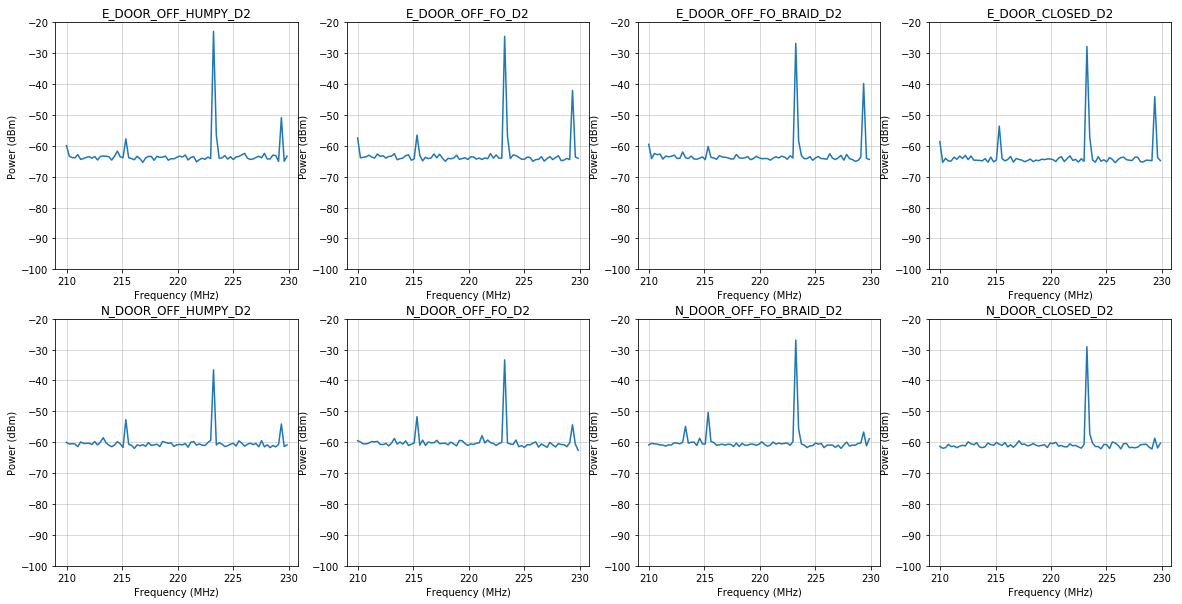

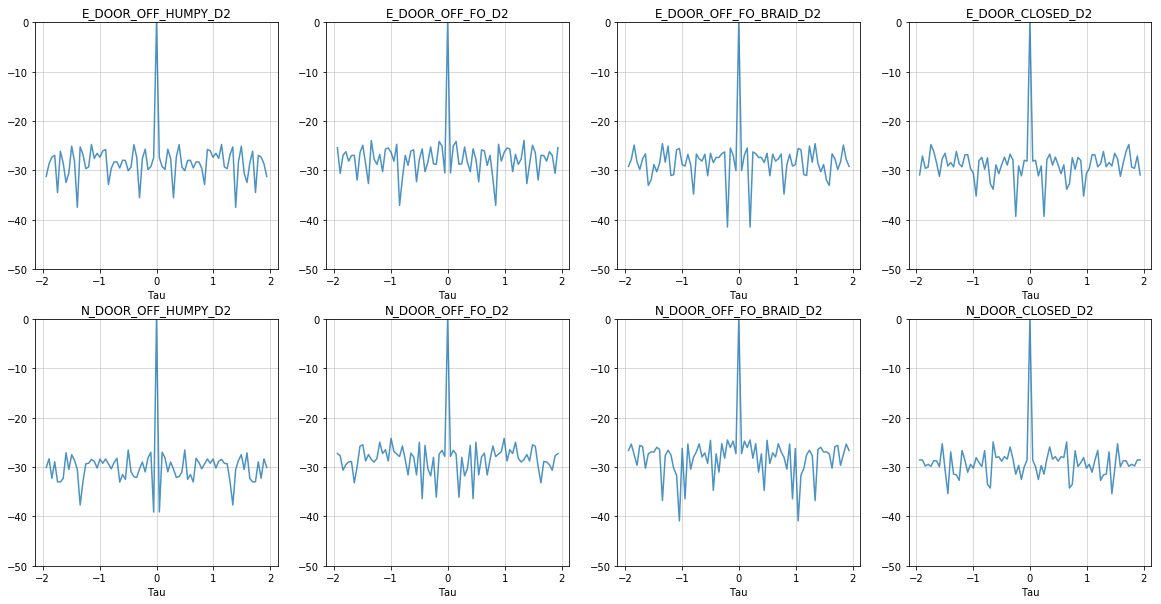

In [113]:
tests = ['OFF_HUMPY_D2','OFF_FO_D2','OFF_FO_BRAID_D2','CLOSED_D2']
plot_spectra(tests=tests, Type='spectra', namePrefix='Day2_FreqSpectra_HIGH_flagged', save=True, freqClip=[210,230], flag=False)
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_HIGH_flagged', save=True, freqClip=[210,230], flag=True)

Flagging 1, pol E at 120.215000MHz
Flagging 1, pol N at 120.215000MHz
Flagging 3, pol E at 123.530000MHz
Flagging 3, pol E at 124.805000MHz


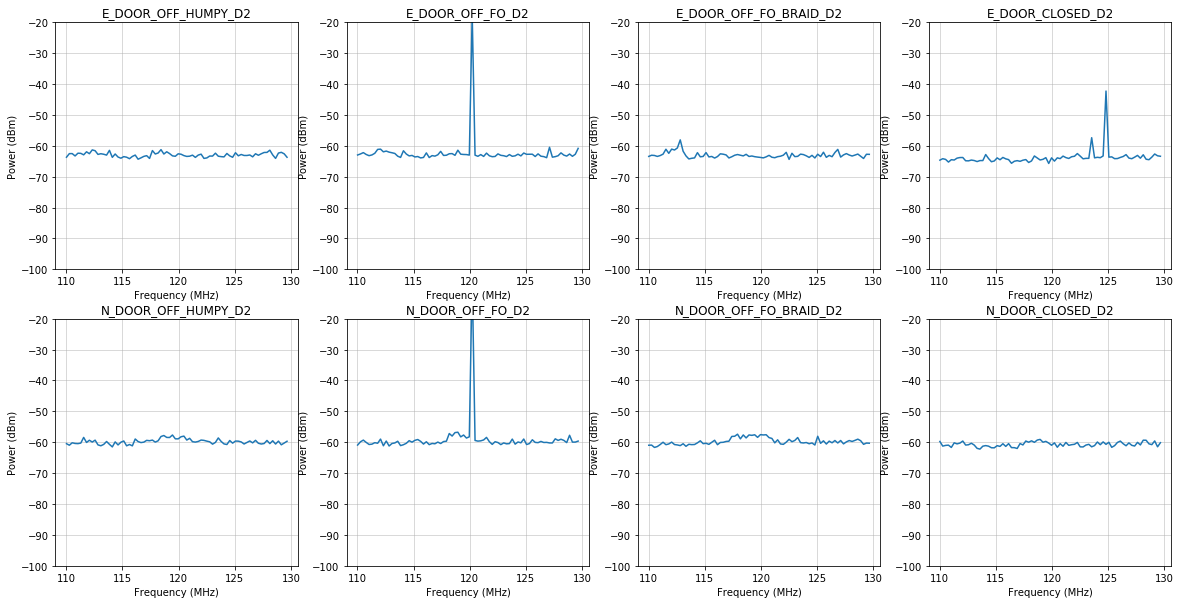

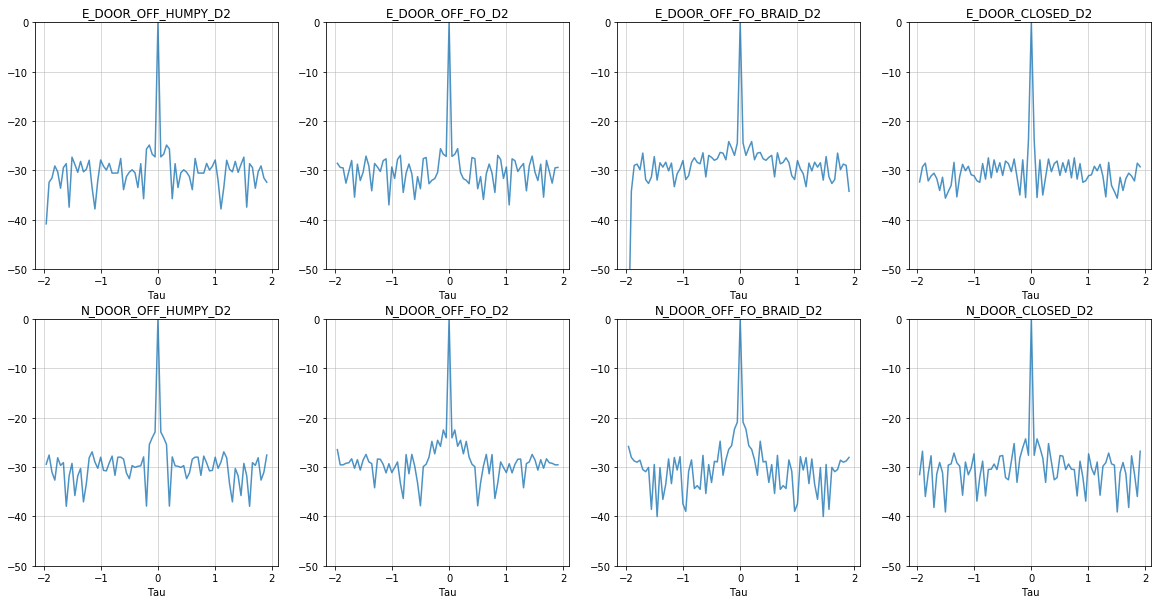

In [115]:
plot_spectra(tests=tests, Type='spectra', namePrefix='Day2_FreqSpectra_MED_flagged', save=True, freqClip=[110,130])
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_MED_flagged', save=True, freqClip=[110,130], flag=True)

Flagging 0, pol N at 89.360000MHz
Flagging 1, pol E at 88.340000MHz
Flagging 1, pol N at 88.340000MHz
Flagging 1, pol N at 88.595000MHz
Flagging 2, pol E at 70.490000MHz
Flagging 2, pol E at 75.590000MHz
Flagging 2, pol E at 88.340000MHz
Flagging 2, pol N at 88.340000MHz
Flagging 3, pol N at 88.595000MHz


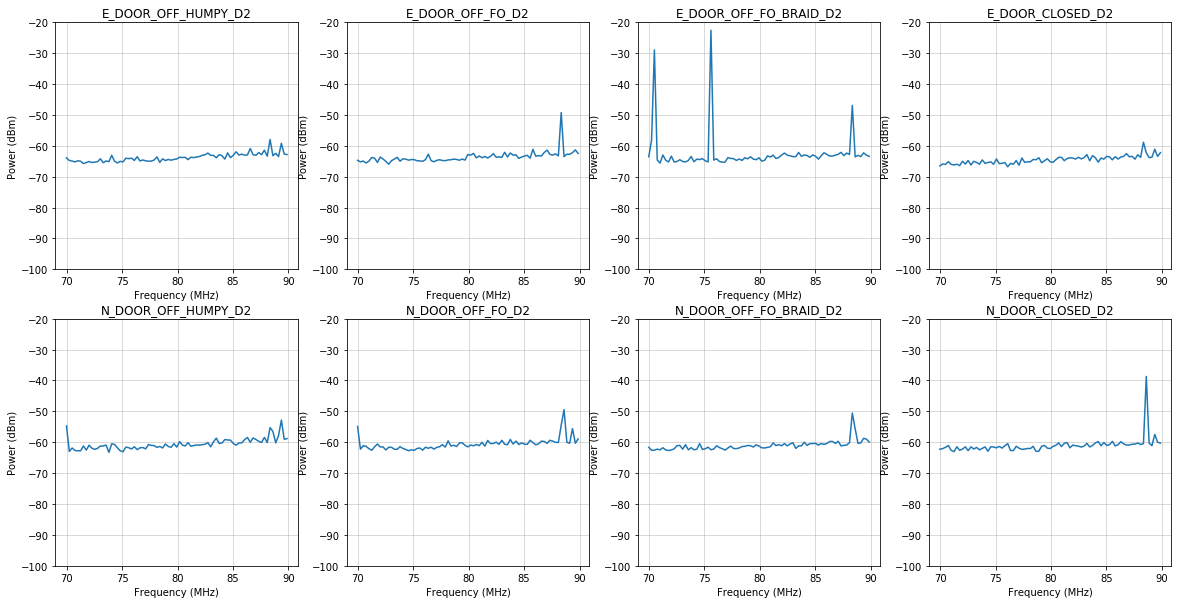

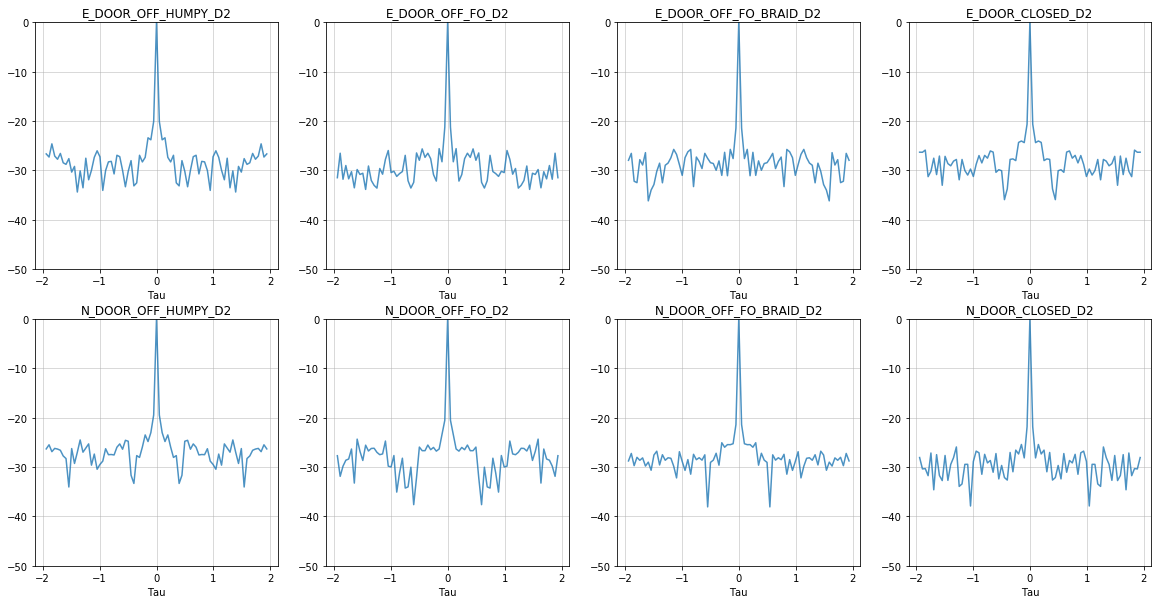

In [127]:
tests = ['OFF_HUMPY_D2','OFF_FO_D2','OFF_FO_BRAID_D2','CLOSED_D2']
plot_spectra(tests=tests, Type='spectra', namePrefix='Day2_FreqSpectra_LOW_flagged', save=True, freqClip=[70,90])
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_LOW_flagged', save=True, freqClip=[70,90], flag=True)

Flagging 0, pol N at 69.980000MHz
Flagging 1, pol N at 69.980000MHz
Flagging 2, pol E at 70.490000MHz
Flagging 2, pol E at 75.590000MHz
Flagging 0, pol N at 69.980000MHz
Flagging 1, pol N at 69.980000MHz
Flagging 2, pol E at 70.490000MHz
Flagging 2, pol E at 75.590000MHz


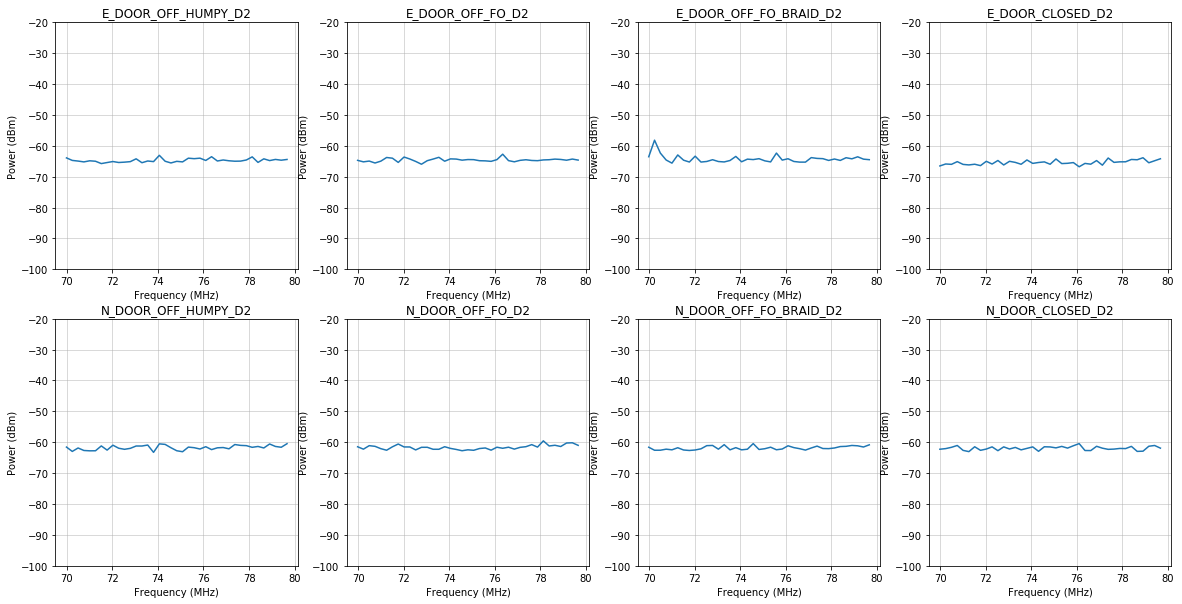

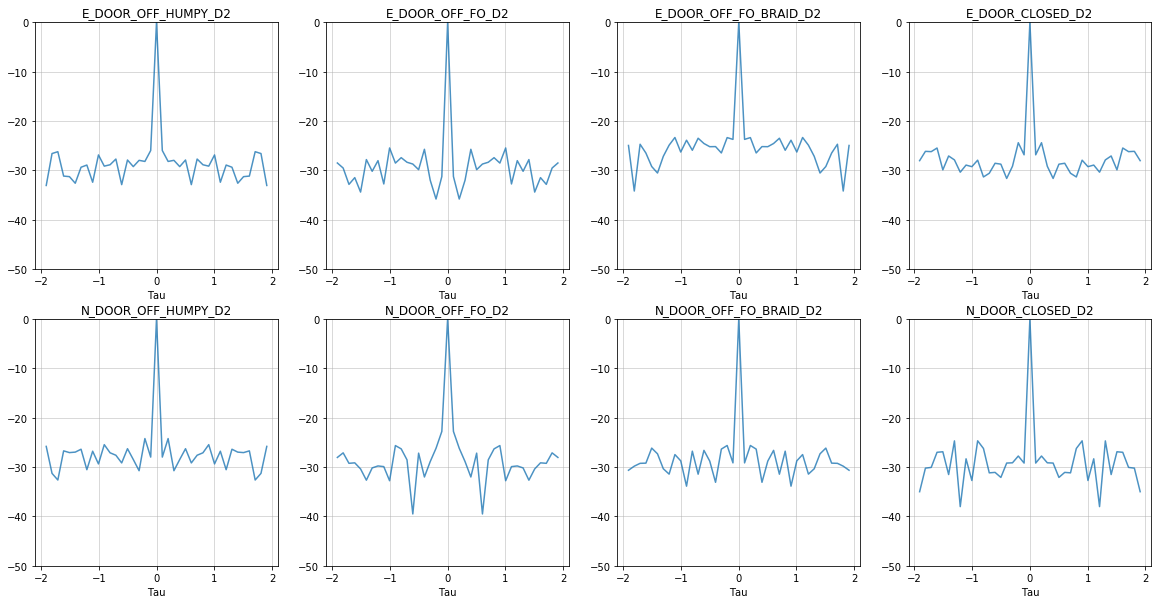

In [96]:
plot_spectra(tests=tests, Type='spectra', namePrefix='Day2_FreqSpectra_LOW_flagged', save=True, freqClip=[70,80], flag=True)
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_LOW_flagged', save=True, freqClip=[70,80], flag=True)

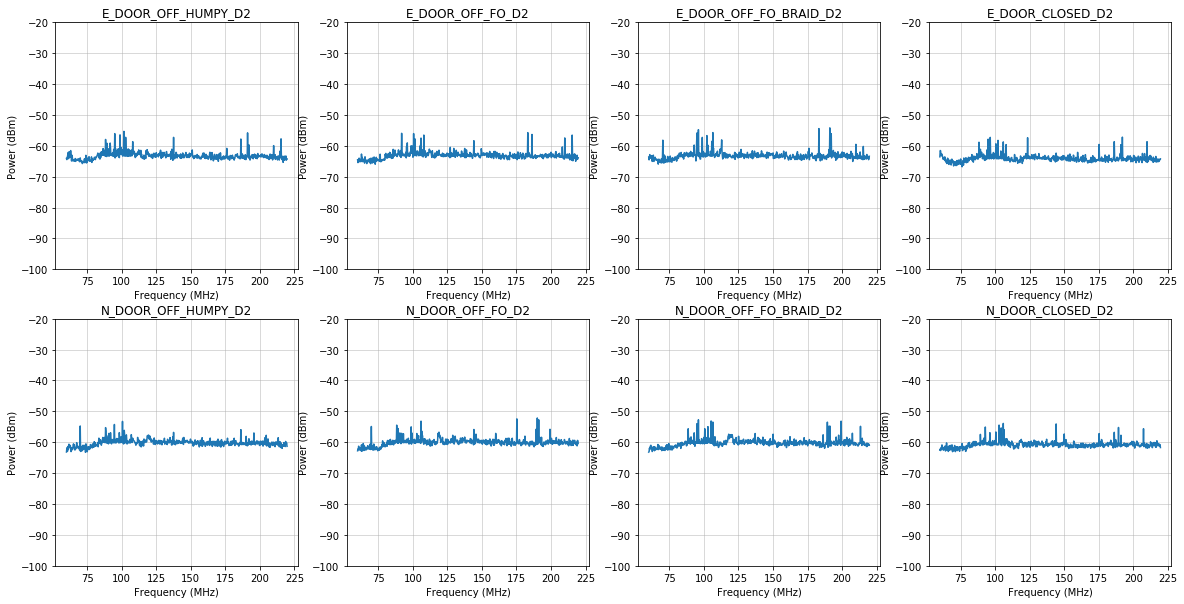

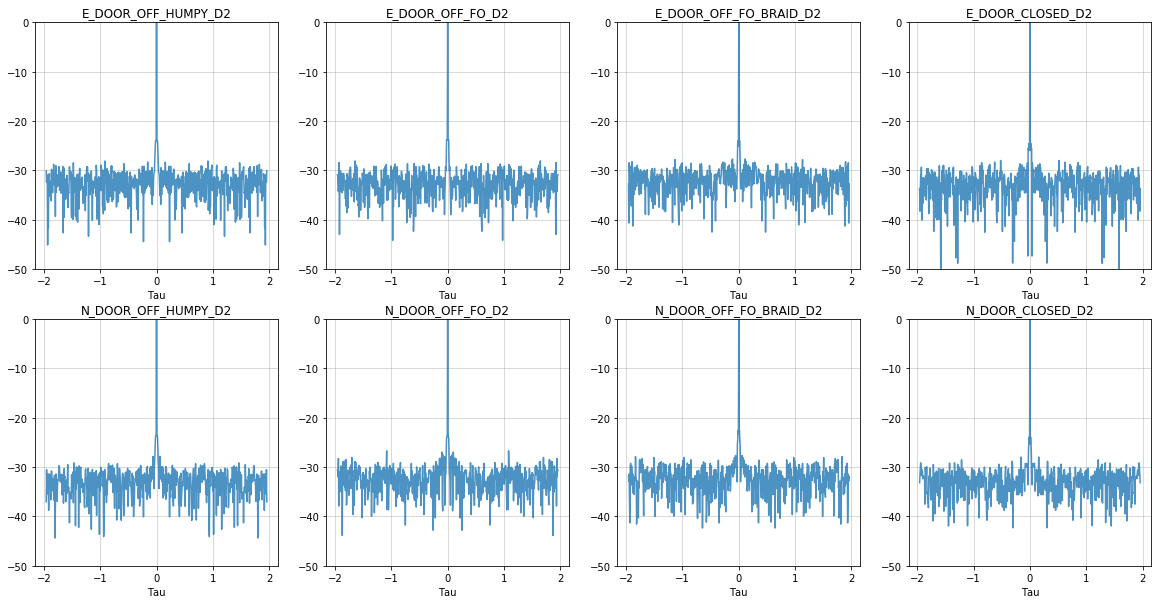

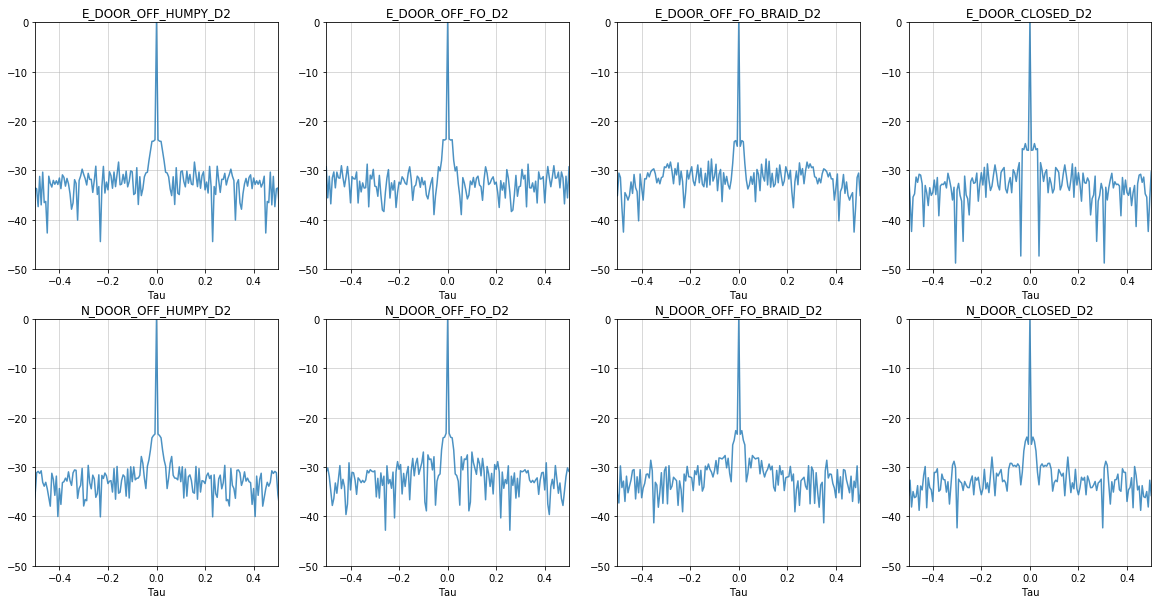

In [137]:
tests = ['OFF_HUMPY_D2','OFF_FO_D2','OFF_FO_BRAID_D2','CLOSED_D2']
plot_spectra(tests=tests, Type='spectra', namePrefix='Day2_FreqSpectra_LOW_flagged', save=False, flag=True, freqClip=[60,220])
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_LOW_flagged', save=False, flag=True, freqClip=[60,220])
plot_spectra(tests=tests, Type='delay', namePrefix='Day2_DelaySpectra_LOW_flagged', save=False, flag=True, freqClip=[60,220], clipDelay=True)